In [2]:
from sklearn.datasets import fetch_mldata
import numpy as np
custom_data_home = "./"
mnist = fetch_mldata('MNIST original', data_home=custom_data_home)

In [3]:
print mnist.data.shape

(70000, 784)


In [6]:
print mnist.target.shape

(70000,)


In [7]:
np.unique(mnist.target)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [8]:
from sklearn.decomposition import PCA
X0 = mnist.data[0:1000,:]
X1 = mnist.data[7000:8000,:]
X2 = mnist.data[14000:15000,:]

#Y = mnist.target[0:1000]
pca = PCA(n_components=196)
X = np.concatenate((X0,X1,X2),axis=0)
pca.fit(X)
x_transformed = pca.transform(X)

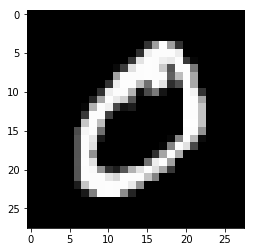

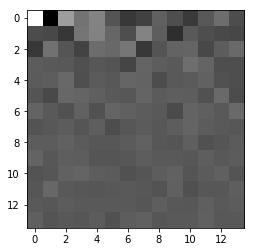

In [9]:
import matplotlib.pyplot as plt
img0 = X[0,:].reshape([28,28])
img0_bis = x_transformed[0,:].reshape([14,14])
plt.figure(1)
plt.imshow(img0, cmap ='gray');
plt.figure(2)
plt.imshow(img0_bis, cmap ='gray');
plt.show()

In [10]:
print(pca.singular_values_) 

[ 48271.66568149  30287.50227979  26517.22998037  24333.86711183
  21088.2875698   20212.93903291  17552.22122459  16143.02061923
  15696.32007682  14619.42790921  13764.94369378  12819.06697651
  12734.8017651   11825.56707532  11501.63499252  11223.33209228
  10624.39366188  10176.79478109   9995.17025925   9686.99860316
   9496.69065649   9016.62770127   8971.45766239   8569.36700987
   8245.10581523   8173.52119361   8092.83051914   7834.81128679
   7791.73168287   7435.55261666   7402.4252974    7235.10629988
   6916.8855495    6865.09542349   6585.60653824   6511.97459818
   6366.94769812   6221.56046779   6044.01763886   6010.17801397
   5886.86951765   5858.26476338   5781.05275041   5703.05406717
   5608.38650136   5503.9940245    5379.92633524   5301.86952054
   5273.82926876   5153.75674376   4993.12854302   4965.89419912
   4837.05666919   4781.68610432   4740.01862209   4651.18253982
   4563.4782717    4495.34084594   4448.46044656   4402.24957235
   4354.10206689   4276.1

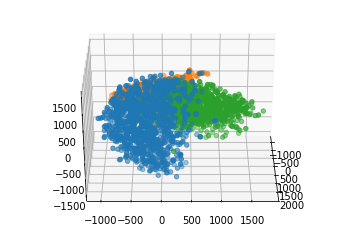

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Y = mnist.target[0:1000]
pca = PCA(n_components=3)
X = np.concatenate((X0,X1,X2),axis=0)
pca.fit(X)
x_transformed = pca.transform(X)

#plt.plot(x_transformed[0:1000,0],x_transformed[0:1000,1],'r+',x_transformed[1000:2000,0],x_transformed[1000:2000,1],'b+',
#         x_transformed[2000:3000,0],x_transformed[2000:3000,1],'g+')
#plt.show()
#         x_transformed[2000:3000,0],x_transformed[2000:3000,1],'g+')
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_transformed[0:1000,0],x_transformed[0:1000,1],x_transformed[0:1000,2],'r+')
ax.scatter(x_transformed[1000:2000,0],x_transformed[1000:2000,1],x_transformed[1000:2000,2],'g+')
ax.scatter(x_transformed[2000:3000,0],x_transformed[2000:3000,1],x_transformed[2000:3000,2],'v+')
# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.show()
    plt.pause(10)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=42)
print x_train.shape

scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [65]:
from sklearn.svm import SVC, LinearSVC
svc = LinearSVC(max_iter=50)
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=50,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [66]:
print svc.score(x_test, y_test)

0.764


In [73]:
pca = PCA(n_components=250)
pca.fit(x_train)
x_train_transformed = pca.transform(x_train)
x_test_transformed = pca.transform(x_test)

scaler_bis = StandardScaler()
scaler_bis.fit(x_train_transformed)
X_train_transformed = scaler_bis.transform(x_train_transformed)
X_test_transformed = scaler_bis.transform(x_test_transformed)
svc_bis = LinearSVC(max_iter=50)
svc_bis.fit(X_train_transformed, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=50,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [74]:
print svc_bis.score(X_test_transformed, y_test)

0.872333333333
